# HR Analytics Employee Attrition & Performance

__Problem Statement:__

Uncover the factors that lead to employee attrition and also explore important questions such as 
* show me a breakdown of distance from home by job role and attrition
* compare average monthly income by education and attrition
* Is there a gender bias in the pay?


For the features like Education, EnvironmentSatisfaction,JobInvolvement,JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance, rating goes 1 to 5 for low to high
For example:
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'


__Imports__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

__Data Loading__

In [2]:
emp_attr = pd.read_csv('employee_data.csv')
emp_attr.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
emp_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1454 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
emp_attr.iloc[0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                                    f
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

__Exploring the data__

In [5]:
for col in emp_attr.columns:
    if emp_attr[col].dtypes =='O':
        print (col,': ',emp_attr[col].unique())

Attrition :  ['Yes' 'No']
BusinessTravel :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department :  ['Sales' 'Research & Development' 'Human Resources']
EducationField :  ['Life Sciences' 'Other' 'Medical' 'Life Sci' 'Marketing'
 'Technical Degree' 'Human Resources']
Gender :  ['f' nan 'Male' 'Female' 'm' 'F']
JobRole :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Research scntist'
 'Research Dir' 'Human Resources' 'mgr' 'Laboratory Tech'
 'Manufacturing Dir']
MaritalStatus :  ['Single' 'Married' 'Divorced' 'm' 'Divorcee' 'Marrid' 'marry']
Over18 :  ['Y']
OverTime :  ['Yes' 'No']


__Comments__ This shows we need to do data cleaning(EducationField,Gender,JobRole,MaritalStatus) . for example, Marital_status has values like marry,marrid which should be grouped under 'Married', similarly Divorcee
 should be grouped under Divorced

# Cleaning the categorical columns

In [6]:
emp_attr['EducationField'] = np.where(emp_attr['EducationField']=='Life Sci','Life Sciences',emp_attr['EducationField'])
emp_attr['Gender'] = np.where(emp_attr['Gender'] == 'm' ,'Male',emp_attr['Gender'])
emp_attr['Gender'] = np.where(((emp_attr['Gender'] == 'f') | (emp_attr['Gender'] == 'F')) ,'Female',emp_attr['Gender'])

In [7]:
emp_attr['Gender'].value_counts() # 40% of data are Female and the rest 60% are Male

Male      869
Female    585
Name: Gender, dtype: int64

In [8]:
jobrole_dict ={'Research Dir':'Research Director','mgr':'Manager','Laboratory Tech':'Laboratory Technician',
               'Research scntist':'Research Scientist','Manufacturing Dir':'Manufacturing Director','Sales Executive':'Sales Executive',
              'Research Scientist':'Research Scientist','Laboratory Technician':'Laboratory Technician',
              'Manufacturing Director':'Manufacturing Director','Healthcare Representative':'Healthcare Representative',
              'Manager':'Manager','Sales Representative':'Sales Representative','Research Director':'Research Director',
              'Human Resources':'Human Resources'}

In [12]:
emp_attr['JobRole'] = emp_attr['JobRole'].map(jobrole_dict)

In [9]:
marital_status_dict ={'Single':'Single','Married':'Married','Divorced':'Divorced','m':'Married','Divorcee':'Divorced',
                     'Marrid':'Married','marry':'Married'}

In [10]:
emp_attr['MaritalStatus'] = emp_attr['MaritalStatus'].map(marital_status_dict)


In [11]:
for col in emp_attr.columns:
    if emp_attr[col].dtypes =='O':
        print (col,': ',emp_attr[col].unique())

Attrition :  ['Yes' 'No']
BusinessTravel :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department :  ['Sales' 'Research & Development' 'Human Resources']
EducationField :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender :  ['Female' nan 'Male']
JobRole :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Research scntist'
 'Research Dir' 'Human Resources' 'mgr' 'Laboratory Tech'
 'Manufacturing Dir']
MaritalStatus :  ['Single' 'Married' 'Divorced']
Over18 :  ['Y']
OverTime :  ['Yes' 'No']


# Finding and Handling NULL values in columns


In [12]:
for col in emp_attr.columns:
    if emp_attr[col].isnull().sum()>0:
        print (col,' : ',emp_attr[col].isnull().sum(),emp_attr[col].dtypes )

Gender  :  16 object
MonthlyIncome  :  10 float64
MonthlyRate  :  1 float64


It has NULL values for the 1 categorical and 2 numerical columns


In [13]:
# Finding the rows having NULL values for 'MonthlyRate' column
emp_attr[emp_attr['MonthlyRate'].isnull()].transpose()

,103
Age,34
Attrition,No
BusinessTravel,Travel_Rarely
DailyRate,665
Department,Research & Development
DistanceFromHome,6
Education,4
EducationField,Other
EmployeeCount,1
EmployeeNumber,138


In [14]:
# Finding average Monthly rate of each department,jobrole, totalworkingyears and use that value for NULL values
monthly_rate_df = emp_attr.groupby(['Department','JobRole','TotalWorkingYears'])['MonthlyRate'].mean().reset_index()

In [15]:
emp_attr_mr = emp_attr.merge(monthly_rate_df, on=['Department','JobRole','TotalWorkingYears'], how='left')
emp_attr_mr['MonthlyRate'] = np.where(emp_attr_mr['MonthlyRate_x'].isnull(),emp_attr_mr['MonthlyRate_y'],emp_attr_mr['MonthlyRate_x'])
emp_attr_mr = emp_attr_mr.drop(['MonthlyRate_x','MonthlyRate_y'],axis=1)

In [16]:
# Finding the rows having NULL values for 'MonthlyRate' column
emp_attr[emp_attr['MonthlyIncome'].isnull()].transpose()

,190,506,561,576,763,838,962,1075,1295,1468
Age,52,37,52,27,34,42,51,32,41,49
Attrition,No,No,No,No,No,Yes,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,699,482,621,829,1333,481,770,495,796,1023
Department,Research & Development,Research & Development,Sales,Sales,Sales,Sales,Human Resources,Research & Development,Sales,Sales
DistanceFromHome,1,3,3,8,10,12,5,10,4,2
Education,4,3,4,1,4,3,3,3,1,3
EducationField,Life Sciences,Other,Marketing,Marketing,Life Sciences,Life Sciences,Life Sciences,Medical,Marketing,Medical
EmployeeCount,1,1,1,1,1,1,1,1,1,1
EmployeeNumber,259,689,776,800,1055,1167,1352,1516,1815,2065


In [17]:
# Finding average Monthly rate of each department,jobrole, totalworkingyears and use that value for NULL values
monthly_income_df = emp_attr.groupby(['Department','JobRole','TotalWorkingYears'])['MonthlyIncome'].mean().reset_index()

In [69]:
emp_attr_mi = emp_attr_mr.merge(monthly_income_df, on=['Department','JobRole','TotalWorkingYears'], how='left')


In [70]:
emp_attr_mi.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome_x', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome_y'],
      dtype='object')

In [71]:
emp_attr_mi['MonthlyIncome'] = np.where(emp_attr_mi['MonthlyIncome_x'].isnull(),emp_attr_mi['MonthlyIncome_y'],emp_attr_mi['MonthlyIncome_x'])


In [72]:
emp_attr_mi['MonthlyIncome'] = np.where(emp_attr_mi['MonthlyIncome'].isnull(),emp_attr_mi['MonthlyIncome'].mean(),emp_attr_mi['MonthlyIncome'])

In [73]:
emp_attr_mi = emp_attr_mi.drop(['MonthlyIncome_x','MonthlyIncome_y'],axis=1)

In [23]:
print (emp_attr_mi.isnull().sum())

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      16
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWit

# Converting Categorical values into Numerical values

In [74]:
emp_attr_mi.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

In [75]:
emp_attr_mi.head(2).transpose()

,0,1
Age,41,49
Attrition,Yes,No
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,1102,279
Department,Sales,Research & Development
DistanceFromHome,1,8
Education,2,1
EducationField,Life Sciences,Life Sciences
EmployeeCount,1,1
EmployeeNumber,1,2


In [76]:
emp_attr_knn = emp_attr_mi.drop(['EmployeeCount','Over18'],axis=1)

In [77]:
emp_attr_upd = emp_attr_knn.copy()

In [78]:
emp_attr_upd.head(3).transpose()

,0,1,2
Age,41,49,37
Attrition,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373
Department,Sales,Research & Development,Research & Development
DistanceFromHome,1,8,2
Education,2,1,2
EducationField,Life Sciences,Life Sciences,Other
EmployeeNumber,1,2,4
EnvironmentSatisfaction,2,3,4


In [80]:

new_emp_attr = pd.get_dummies(data=emp_attr_knn, columns=['Attrition', 'BusinessTravel','Department',
                                                          'EducationField','JobRole','MaritalStatus','OverTime'])

In [81]:
new_emp_attr.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,Female,94,3,2,...,0,0,1,0,0,0,0,1,0,1
1,49,279,8,1,2,3,NaN,61,2,2,...,1,0,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,4,Male,92,2,1,...,0,0,0,0,0,0,0,1,0,1


In [82]:
new_emp_attr['IsMale'] = np.where((new_emp_attr['Gender']=='Male'),1,0)


In [83]:
new_emp_attr['IsMale'] = np.where(new_emp_attr['Gender'].isnull(),np.nan,new_emp_attr['IsMale'])


In [84]:
new_emp_attr = new_emp_attr.drop('Gender',axis=1)

In [39]:
#new_emp_attr = new_emp_attr.drop(['Attrition_No','BusinessTravel_Travel_Rarely','Department_Sales',
#                                  'EducationField_Other','JobRole_Sales Representative'
#                                  ,'MaritalStatus_Single','OverTime_No','StandardHours','Education_5',
#                                 'EnvironmentSatisfaction_4','JobInvolvement_4','JobSatisfaction_4','PerformanceRating_4',
#                                 'RelationshipSatisfaction_4','WorkLifeBalance_4'],axis=1)

In [87]:
new_emp_attr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyRate',
       'MonthlyIncome', 'Attrition_No', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare R

In [88]:
new_emp_attr = new_emp_attr.drop(['Attrition_No','StandardHours'],axis=1)

In [164]:
new_emp_attr.head(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,0,0,0,0,1,0,1,0.0
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,1,0,NaN
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,0,1,1.0
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0.0
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,1,0,1,0,1.0
5,32,1005,2,2,8,4,79,3,1,4,...,0,0,0,0,0,0,1,1,0,1.0
6,59,1324,3,3,10,3,81,4,1,1,...,0,0,0,0,0,1,0,0,1,0.0
7,30,1358,24,1,11,4,67,3,1,3,...,0,0,0,0,1,0,0,1,0,1.0
8,38,216,23,3,12,4,44,2,3,3,...,0,0,0,0,0,0,1,1,0,1.0
9,36,1299,27,3,13,3,94,3,2,3,...,0,0,0,0,0,1,0,1,0,1.0


In [124]:
new_emp_attr.tail(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
1467,27,155,4,3,2064,2,87,4,2,2,...,0,0,0,0,0,1,0,0,1,1.0
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,1,0,0,0,1,0,1,0,1.0
1469,34,628,8,3,2068,2,82,4,2,3,...,0,0,0,0,0,1,0,1,0,1.0


In [90]:
print (new_emp_attr.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeNumber                     1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   HourlyRate                         1470 non-null   int64  
 7   JobInvolvement                     1470 non-null   int64  
 8   JobLevel                           1470 non-null   int64  
 9   JobSatisfaction                    1470 non-null   int64  
 10  NumCompaniesWorked                 1470 non-null   int64  
 11  PercentSalaryHike                  1470 non-null   int64

__Handling NULL values in Categorical column 'Gender column is having 16 rows with NULL values'__

We can replace the NULL in categorical column with any of the below techniques
1. Most Frequent Value
2. Replace with 'Other/Unknown' label
3. Drop the rows having NULL values
4. Use Classification algorithm to find the value ( I am trying KNN classification algorithm to get values for missing Gender column)

In [95]:
emp_attr_gender_test = new_emp_attr[new_emp_attr['IsMale'].isnull()]

In [55]:
new_emp_attr['IsMale'].value_counts()
#Data seems to be a balanced data 

1.0    869
0.0    585
Name: IsMale, dtype: int64

In [92]:
emp_attr_gender_train = new_emp_attr.dropna()

In [174]:
emp_attr_gender_train.tail(10)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
1460,29,468,28,4,2054,4,73,2,1,1,...,0,0,0,0,0,0,1,1,0,0.0
1461,50,410,28,3,2055,4,39,2,3,1,...,0,1,0,0,1,0,0,0,1,1.0
1462,39,722,24,1,2056,2,60,2,4,4,...,0,1,0,0,0,1,0,1,0,0.0
1463,31,325,5,3,2057,2,74,3,2,1,...,0,0,0,0,0,0,1,1,0,1.0
1464,26,1167,5,3,2060,4,30,2,1,3,...,0,0,1,0,0,0,1,1,0,0.0
1465,36,884,23,2,2061,3,41,4,2,4,...,0,0,0,0,0,1,0,1,0,1.0
1466,39,613,6,1,2062,4,42,2,3,1,...,0,0,0,0,0,1,0,1,0,1.0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,0,0,0,0,1,0,0,1,1.0
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,1,0,0,0,1,0,1,0,1.0
1469,34,628,8,3,2068,2,82,4,2,3,...,0,0,0,0,0,1,0,1,0,1.0


__Use all the data except rows having NULL values for Gender as Train data and 
rows with NULL values for Gender as Test data__

In [138]:
emp_attr_gender_train.shape, emp_attr_gender_test.shape

((1454, 57), (16, 57))

In [140]:
emp_attr_gender_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources

In [98]:
emp_attr_gender_test

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,1,0,NaN
68,35,664,1,3,88,2,79,3,1,1,...,0,0,0,0,0,1,0,1,0,NaN
176,33,134,2,3,242,3,90,3,1,4,...,0,0,0,0,0,0,1,1,0,NaN
200,27,472,1,1,274,3,60,2,2,1,...,0,0,0,0,0,1,0,1,0,NaN
279,50,797,4,1,385,1,96,3,5,2,...,0,0,0,0,1,0,0,1,0,NaN
422,19,489,2,2,566,1,52,2,1,4,...,0,0,0,0,0,0,1,1,0,NaN
470,24,535,24,3,632,4,38,3,1,4,...,0,0,1,0,0,1,0,1,0,NaN
503,34,1397,1,5,683,2,42,3,1,4,...,0,0,0,0,0,1,0,1,0,NaN
600,32,859,4,3,830,3,98,2,2,3,...,0,0,0,0,0,1,0,1,0,NaN
691,40,1469,9,4,964,4,35,3,1,2,...,0,0,0,0,1,0,0,0,1,NaN


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [142]:
scaler = StandardScaler()

In [143]:
scaled_data_train = scaler.fit_transform(emp_attr_gender_train.drop(['IsMale','EmployeeNumber'],axis=1))
scaled_data_test = scaler.fit_transform(emp_attr_gender_test.drop(['IsMale','EmployeeNumber'],axis=1))


In [145]:
scaled_data_df = pd.DataFrame(scaled_data_train, columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Tech', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Dir',
       'JobRole_Manufacturing Director', 'JobRole_Research Dir',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Research scntist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_mgr', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'] )

scaled_data_test_df = pd.DataFrame(scaled_data_test, columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Tech', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Dir',
       'JobRole_Manufacturing Director', 'JobRole_Research Dir',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Research scntist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_mgr', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'] )

In [156]:
pd.DataFrame(emp_attr_gender_train['EmployeeNumber'].reset_index().drop(['index'],axis=1))

,EmployeeNumber
0,1
1,4
2,5
3,7
4,8
...,...
1449,2061
1450,2062
1451,2064
1452,2065


In [151]:
scaled_data_train_df['Age']

0       0.444644
1       0.006108
2      -0.432429
3      -1.090235
4      -0.542063
          ...   
1449   -0.103527
1450    0.225376
1451   -1.090235
1452    1.321718
1453   -0.322795
Name: Age, Length: 1454, dtype: float64

In [157]:
# Appending the employee Number  to the Training dataset 'scaled_data_train_df'
scaled_data_train_df_with_emp =  pd.concat([pd.DataFrame(emp_attr_gender_train['EmployeeNumber'].reset_index().drop(['index'],axis=1)),scaled_data_train_df], axis= 1)

In [158]:
scaled_data_train_df_with_emp

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0.444644,0.741969,-1.015478,-0.898156,-0.659182,1.381535,0.378340,-0.062781,1.155879,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,-1.584953,1.584953
1,4,0.006108,1.413308,-0.892241,-0.898156,1.171670,1.283091,-1.024993,-0.966585,0.248891,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,-1.584953,1.584953
2,5,-0.432429,1.460376,-0.769003,1.061212,1.171670,-0.488903,0.378340,-0.966585,0.248891,...,2.029709,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
3,7,-1.090235,-0.523915,-0.892241,-1.877839,-1.574608,-1.276456,0.378340,-0.966585,-0.658096,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
4,8,-0.542063,0.501674,-0.892241,-0.898156,1.171670,0.643204,0.378340,-0.966585,1.155879,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2061,-0.103527,0.201925,1.695740,-0.898156,0.256244,-1.227234,1.781674,-0.062781,1.155879,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
1450,2062,0.225376,-0.469415,-0.399292,-1.877839,1.171670,-1.178012,-1.024993,0.841022,-1.565084,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
1451,2064,-1.090235,-1.604003,-0.645766,0.081528,-0.659182,1.036981,1.781674,-0.062781,-0.658096,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1452,2065,1.321718,0.546265,-0.892241,0.081528,1.171670,-0.144349,-1.024993,-0.062781,-0.658096,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933


In [159]:
# Appending the employee Number  to the Test dataset 'scaled_data_test_df'
scaled_data_test_df_with_emp =  pd.concat([pd.DataFrame(emp_attr_gender_test['EmployeeNumber'].reset_index().drop(['index'],axis=1)),scaled_data_test_df], axis= 1)

In [171]:
scaled_data_test_df_with_emp

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2,1.406583,-1.394302,0.555830,-1.277440,0.112509,-0.054741,-1.179324,0.438357,-0.942809,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
1,88,-0.006308,-0.368272,-0.689229,0.357683,-0.787562,0.821113,0.536056,-0.563602,-1.885618,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
2,242,-0.208149,-1.780729,-0.511364,0.357683,0.112509,1.356356,0.536056,-0.563602,0.942809,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,-1.290994,2.645751,0.377964,-0.377964
3,274,-0.813674,-0.879954,-0.689229,-1.277440,0.112509,-0.103399,-1.179324,0.438357,-1.885618,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
4,385,1.507504,-0.013825,-0.155632,-1.277440,-1.687632,1.648307,0.536056,3.444234,-0.942809,...,-0.881917,0.0,0.0,-0.258199,0.0,1.732051,-1.290994,-0.377964,0.377964,-0.377964
5,566,-1.621040,-0.834649,-0.511364,-0.459879,-1.687632,-0.492668,-1.179324,-0.563602,0.942809,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,-1.290994,2.645751,0.377964,-0.377964
6,632,-1.116436,-0.712058,3.401680,0.357683,1.012579,-1.173887,0.536056,-0.563602,0.942809,...,-0.881917,0.0,0.0,3.872983,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
7,683,-0.107228,1.585183,-0.689229,1.992807,-0.787562,-0.979253,0.536056,-0.563602,0.942809,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
8,830,-0.309070,0.151406,-0.155632,0.357683,0.112509,1.745625,-1.179324,0.438357,0.000000,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
9,964,0.498296,1.777064,0.733696,1.175245,1.012579,-1.319862,0.536056,-0.563602,-0.942809,...,1.133893,0.0,0.0,-0.258199,0.0,1.732051,-1.290994,-0.377964,-2.645751,2.645751


In [172]:
scaled_data_train_df_with_emp

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,0.444644,0.741969,-1.015478,-0.898156,-0.659182,1.381535,0.378340,-0.062781,1.155879,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,-1.584953,1.584953
1,4,0.006108,1.413308,-0.892241,-0.898156,1.171670,1.283091,-1.024993,-0.966585,0.248891,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,-1.584953,1.584953
2,5,-0.432429,1.460376,-0.769003,1.061212,1.171670,-0.488903,0.378340,-0.966585,0.248891,...,2.029709,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
3,7,-1.090235,-0.523915,-0.892241,-1.877839,-1.574608,-1.276456,0.378340,-0.966585,-0.658096,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
4,8,-0.542063,0.501674,-0.892241,-0.898156,1.171670,0.643204,0.378340,-0.966585,1.155879,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2061,-0.103527,0.201925,1.695740,-0.898156,0.256244,-1.227234,1.781674,-0.062781,1.155879,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
1450,2062,0.225376,-0.469415,-0.399292,-1.877839,1.171670,-1.178012,-1.024993,0.841022,-1.565084,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
1451,2064,-1.090235,-1.604003,-0.645766,0.081528,-0.659182,1.036981,1.781674,-0.062781,-0.658096,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1452,2065,1.321718,0.546265,-0.892241,0.081528,1.171670,-0.144349,-1.024993,-0.062781,-0.658096,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933


In [184]:
X = scaled_data_train_df_with_emp
y = emp_attr_gender_train['IsMale'].reset_index().drop('index',axis=1)

In [216]:
y= np.ravel(y)

In [217]:
# Splitting the data 'scaled_data_train_df' into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state= 42)

In [218]:
#X_train_1 = X_train.drop('EmployeeNumber',axis=1)
X_test_1  = X_test.drop('EmployeeNumber',axis=1)

In [219]:
X_train_1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
846,-1.638406,1.123468,-0.769003,1.061212,0.256244,-0.882679,-1.024993,-0.966585,1.155879,-1.080012,...,2.029709,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
802,0.335010,1.252286,0.586606,0.081528,0.256244,-1.079568,-1.024993,2.648630,0.248891,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
1379,-0.651698,-0.120120,2.065452,1.061212,-1.574608,-0.144349,0.378340,-0.062781,1.155879,-0.680130,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1345,-1.199869,0.727105,-0.399292,0.081528,0.256244,-0.242793,1.781674,-0.966585,1.155879,-1.080012,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
485,1.212084,1.073923,-1.015478,1.061212,1.171670,-1.276456,-1.024993,1.744826,-1.565084,1.719163,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.213161,-1.730344,-0.892241,0.081528,-1.574608,0.150984,0.378340,-0.966585,-1.565084,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,1.871242,-0.915521,-0.688945,-1.584953,1.584953
1130,-0.103527,-0.603187,0.340131,1.061212,0.256244,0.495538,0.378340,-0.062781,0.248891,2.518927,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1294,2.308426,1.024377,0.709843,1.061212,-1.574608,1.036981,0.378340,1.744826,0.248891,-0.280248,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
860,-0.761332,0.125129,-0.276055,1.061212,0.256244,-0.833457,0.378340,-0.062781,0.248891,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,1.871242,-0.915521,-0.688945,0.630933,-0.630933


# Building KNN Model
(To find the Gender column for NULL values)

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [245]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_1,y_train)

KNeighborsClassifier(n_neighbors=13)

In [246]:
y_pred = knn.predict(X_test_1)

In [205]:
y_pred

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Finding Optimal K value (Hyperparameter Turning)

In [247]:
print (confusion_matrix(y_test,y_pred))
print (classification_report(y_test,y_pred))

[[ 46 102]
 [ 54 162]]
              precision    recall  f1-score   support

         0.0       0.46      0.31      0.37       148
         1.0       0.61      0.75      0.67       216

    accuracy                           0.57       364
   macro avg       0.54      0.53      0.52       364
weighted avg       0.55      0.57      0.55       364



In [248]:
from sklearn.metrics import accuracy_score
print (knn.score(X_test_1, y_test))

0.5714285714285714


In [249]:
print (knn.score(X_train_1, y_train))

0.6449541284403669


In [250]:
score_list =[]
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_1,y_train)
    y_pred = knn.predict(X_test_1)
    score_list.append(knn.score(X_test_1, y_test))
score_list.index(max(score_list))

12

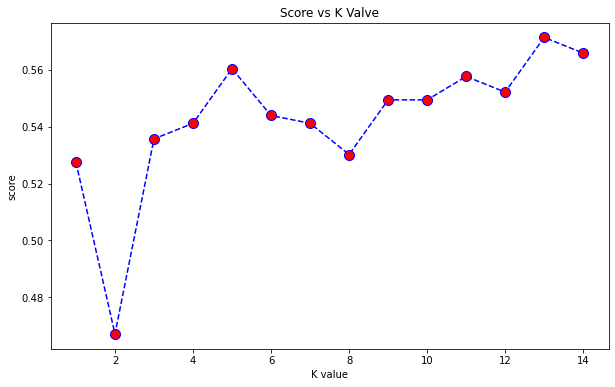

In [244]:
plt.figure(figsize =(10,6))
plt.plot(range(1,15),score_list, color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
_=plt.title('Score vs K Valve')
_=plt.xlabel('K value')
_=plt.ylabel('score')

Based on this, I am selecting k value as 13

In [251]:
X_test_1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
497,-1.199869,0.466992,-0.399292,0.081528,0.256244,0.249428,0.378340,-0.966585,1.155879,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1260,0.006108,-0.528869,-0.029580,-0.898156,-0.659182,-0.981124,-1.024993,-0.062781,-0.658096,-0.680130,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
411,0.115742,1.703149,-0.892241,-0.898156,1.171670,-1.178012,0.378340,-0.966585,1.155879,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
1179,1.321718,0.016129,-1.015478,0.081528,0.256244,-1.473344,0.378340,1.744826,0.248891,0.519517,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
1033,-0.322795,1.296877,-0.769003,0.081528,1.171670,0.741648,-2.428327,-0.062781,-1.565084,0.119635,...,-0.492681,-0.026234,1.860141,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,-0.213161,0.365424,-0.276055,0.081528,0.256244,-0.341237,0.378340,0.841022,0.248891,0.119635,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,-0.915521,1.451495,0.630933,-0.630933
243,-0.322795,-0.823664,-0.892241,1.061212,1.171670,0.889315,-1.024993,-0.062781,-1.565084,1.319281,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,0.630933,-0.630933
493,-0.542063,-0.387665,-0.029580,1.061212,-1.574608,1.283091,0.378340,-0.062781,1.155879,-0.680130,...,2.029709,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953
915,-0.980600,-1.509867,-0.892241,0.081528,1.171670,-0.685791,-1.024993,-0.966585,1.155879,-0.680130,...,-0.492681,-0.026234,-0.537594,-0.244472,-0.037113,-0.534404,1.092274,-0.688945,-1.584953,1.584953


In [252]:
scaled_data_test_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.406583,-1.394302,0.555830,-1.277440,0.112509,-0.054741,-1.179324,0.438357,-0.942809,-0.492366,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
1,-0.006308,-0.368272,-0.689229,0.357683,-0.787562,0.821113,0.536056,-0.563602,-1.885618,0.984732,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
2,-0.208149,-1.780729,-0.511364,0.357683,0.112509,1.356356,0.536056,-0.563602,0.942809,-0.984732,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,-1.290994,2.645751,0.377964,-0.377964
3,-0.813674,-0.879954,-0.689229,-1.277440,0.112509,-0.103399,-1.179324,0.438357,-1.885618,1.477098,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
4,1.507504,-0.013825,-0.155632,-1.277440,-1.687632,1.648307,0.536056,3.444234,-0.942809,0.492366,...,-0.881917,0.0,0.0,-0.258199,0.0,1.732051,-1.290994,-0.377964,0.377964,-0.377964
5,-1.621040,-0.834649,-0.511364,-0.459879,-1.687632,-0.492668,-1.179324,-0.563602,0.942809,-0.492366,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,-1.290994,2.645751,0.377964,-0.377964
6,-1.116436,-0.712058,3.401680,0.357683,1.012579,-1.173887,0.536056,-0.563602,0.942809,-0.984732,...,-0.881917,0.0,0.0,3.872983,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
7,-0.107228,1.585183,-0.689229,1.992807,-0.787562,-0.979253,0.536056,-0.563602,0.942809,-0.492366,...,1.133893,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
8,-0.309070,0.151406,-0.155632,0.357683,0.112509,1.745625,-1.179324,0.438357,0.000000,-0.492366,...,-0.881917,0.0,0.0,-0.258199,0.0,-0.577350,0.774597,-0.377964,0.377964,-0.377964
9,0.498296,1.777064,0.733696,1.175245,1.012579,-1.319862,0.536056,-0.563602,-0.942809,2.954196,...,1.133893,0.0,0.0,-0.258199,0.0,1.732051,-1.290994,-0.377964,-2.645751,2.645751


In [253]:
# This is the test data having NULL values for Gender column
y_pred = knn.predict(scaled_data_test_df)

In [254]:
print (y_pred)

[1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.]


In [255]:
emp_attr_gender_test['IsMale']= y_pred

<ipython-input-255-39105ec43b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_attr_gender_test['IsMale']= y_pred


In [256]:
emp_attr_gender_test.isnull().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
MonthlyRate                          0
MonthlyIncome                        0
Attrition_Yes                        0
BusinessTravel_Non-Travel

In [257]:
emp_attr_cleaned = pd.concat([emp_attr_gender_train,emp_attr_gender_test])

In [258]:
emp_attr_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1174
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EmployeeNumber                     1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   HourlyRate                         1470 non-null   int64  
 7   JobInvolvement                     1470 non-null   int64  
 8   JobLevel                           1470 non-null   int64  
 9   JobSatisfaction                    1470 non-null   int64  
 10  NumCompaniesWorked                 1470 non-null   int64  
 11  PercentSalaryHike                  1470 non-null   int64

In [86]:
emp_attr_cleaned.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobLevel',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'Department_Research & Development',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'OverT

In [293]:
emp_attr_cleaned

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,0,0,0,0,1,0,1,0.0
1,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,0,1,1.0
2,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0.0
3,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,1,0,1,0,1.0
4,32,1005,2,2,8,4,79,3,1,4,...,0,0,0,0,0,0,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,25,1219,4,1,1106,4,32,3,1,4,...,0,0,0,0,0,1,0,0,1,1.0
1466,35,636,4,4,1185,4,47,2,1,4,...,0,0,0,0,0,1,0,1,0,1.0
1467,37,977,1,3,1196,4,56,2,2,4,...,0,0,0,0,0,1,0,1,0,0.0
1468,40,896,2,3,1474,3,68,3,1,3,...,0,0,0,0,1,0,0,1,0,0.0


In [310]:
emp_attr_cleaned.to_csv('employee_data_cleaned.csv', index=False)

# Finding Columns with High Significance

In [261]:
df1 = emp_attr_cleaned.corr()

In [265]:
df2 = pd.DataFrame(df1.loc['Attrition_Yes'].sort_values(ascending=False))

In [295]:
# Features are co-related with the target column Attrition 
df2[((df2['Attrition_Yes']>= 0.05) | (df2['Attrition_Yes'] <= -0.05) )].index

Index(['Attrition_Yes', 'OverTime_Yes', 'MaritalStatus_Single',
       'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement',
       'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age',
       'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears',
       'OverTime_No'],
      dtype='object')

In [282]:
df2

,Attrition_Yes
Attrition_Yes,1.000000
OverTime_Yes,0.246118
MaritalStatus_Single,0.175419
JobRole_Sales Representative,0.157234
BusinessTravel_Travel_Frequently,0.115143
EnvironmentSatisfaction,-0.103369
JobSatisfaction,-0.103481
JobInvolvement,-0.130016
YearsAtCompany,-0.134392
StockOptionLevel,-0.137145


# Transformation of data

In [297]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [298]:
mm_scaled = MinMaxScaler()

In [302]:
emp_attr_cleaned.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources

In [304]:
scaled_data_train = pd.DataFrame(mm_scaled.fit_transform(emp_attr_cleaned.drop(['Attrition_Yes','EmployeeNumber'],axis=1)))


In [305]:
scaled_data_train.columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyRate', 'MonthlyIncome', 
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Tech', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Dir',
       'JobRole_Manufacturing Director', 'JobRole_Research Dir',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Research scntist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobRole_mgr', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes', 'IsMale']

In [307]:
scaled_data_train = pd.concat([emp_attr_cleaned[['EmployeeNumber','Attrition_Yes']],scaled_data_train ],axis=1)

In [308]:
scaled_data_train

,EmployeeNumber,Attrition_Yes,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research scntist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_mgr,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,IsMale
0,1,1,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,1,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,5,0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,8,0,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1106,1,0.166667,0.799571,0.107143,0.00,1.000000,0.028571,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1466,1185,0,0.404762,0.382248,0.107143,0.75,1.000000,0.242857,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1467,1196,0,0.452381,0.626342,0.000000,0.50,1.000000,0.371429,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1468,1474,0,0.523810,0.568361,0.035714,0.50,0.666667,0.542857,0.666667,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [311]:
# This file has cleaned( handled missing values and scaled the data using MinMax Scaler() )
scaled_data_train.to_csv('employee_data_scaled.csv', index=False)